## Datadriven pump_it_up analysis

This is a test notebook that is used to see if i can work with GitHub and do a project in Pycharm on my local computer.
For this project i worked on the Pump it up dataset of datadriven.org
The final score is around .8

------------------

Can you predict which water pumps are faulty?
Using data from Taarifa and the Tanzanian Ministry of Water, can you predict which pumps are functional, which need some repairs, and which don't work at all? This is an intermediate-level practice competition. Predict one of these three classes based on a number of variables about what kind of pump is operating, when it was installed, and how it is managed. A smart understanding of which waterpoints will fail can improve maintenance operations and ensure that clean, potable water is available to communities across Tanzania.

-------------------

TO DO :
Y variable is checked and also the first missing values are removed. 
check which features are irrelevant for the analysis and clean this dataset

-----------------

#### 1. Import the datasets

In [236]:
import pandas as pd
import matplotlib.pyplot as plt

In [237]:
df_train_y = pd.read_csv('/Users/Nelleke/PycharmProjects/Pump_it_up/data/trainingset_labels.csv')

In [238]:
df_train_x = pd.read_csv('/Users/Nelleke/PycharmProjects/Pump_it_up/data/trainingset_values.csv')

In [239]:
df_train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [240]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### 2. Check which variables are in de dataset

##### 2.1 Y variable

The waterpumps have three possible functions: functional, functional repair, non functional


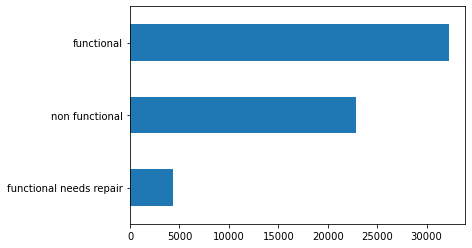

In [241]:
df_train_y['status_group'].value_counts().sort_values().plot(kind='barh')
print('The waterpumps have three possible functions: functional, functional repair, non functional')

In [242]:
df_train_x.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


##### 2.2 X variables

In [243]:
import geopandas

In [244]:
df_train_x = pd.concat([df_train_x, df_train_y], axis=1)

In [245]:
# Only use latitude that we have , take away the non zeros
gdf = geopandas.GeoDataFrame(df_train_x.loc[df_train_x['latitude'] < -0.1], geometry=geopandas.points_from_xy(
    df_train_x.loc[df_train_x['latitude'] < -0.1, 'longitude'], df_train_x.loc[df_train_x['latitude'] < -0.1, 'latitude']))

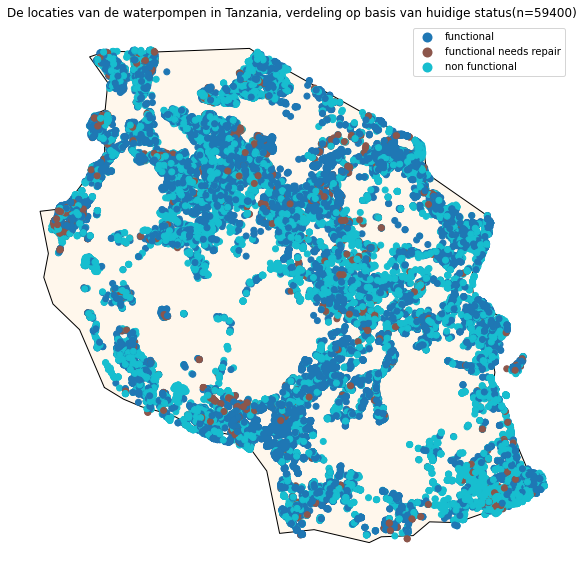

In [246]:
import contextily as ctx
import matplotlib.patches as mpatches

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
tanzania =  world[world.name == "Tanzania"]

ax = tanzania.plot(color='white', edgecolor='black',figsize=(10, 10),cmap='OrRd')
gdf.plot(ax=ax, column='status_group', legend=True)
ax.set_axis_off()
plt.title('De locaties van de waterpompen in Tanzania, verdeling op basis van huidige status(n=59400)')
plt.show()

In [247]:
print('Het totaal aantal meetingen in deze dataset is: ', df_train_x['id'].count())

Het totaal aantal meetingen in deze dataset is:  id    59400
id    59400
dtype: int64


#### 3. Remove irrelevant columns based on missing values, many nans, duplications etc

The missing values per variable


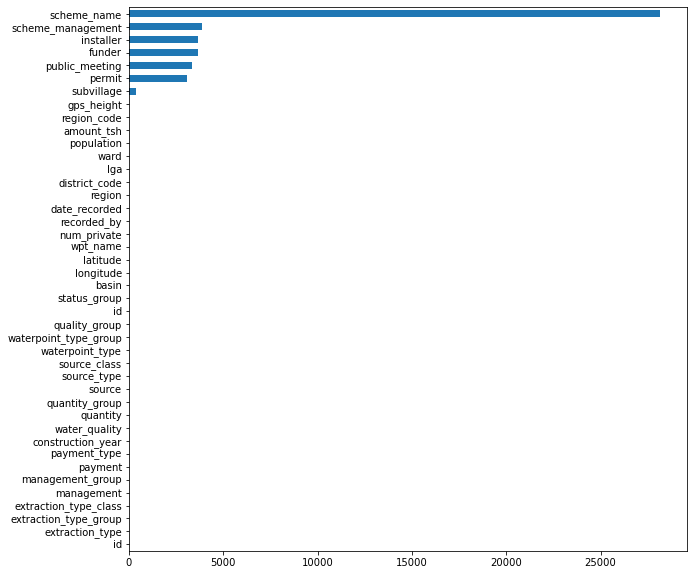

In [248]:
df_train_x.isnull().sum(axis=0).sort_values().plot(kind='barh',figsize=(10,10))
print('The missing values per variable')

scheme_name, scheme_management, installer, funder, public_meeting, permit, subvillage

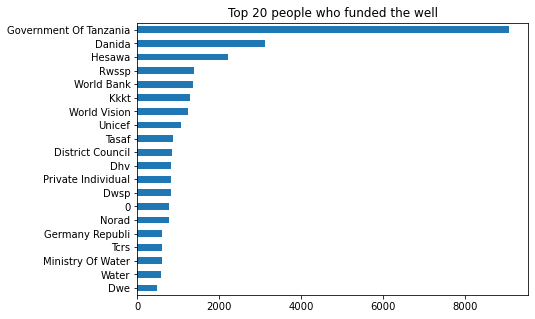

Aantal missing values voor deze variabele is:  3635


In [249]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['funder'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Top 20 people who funded the well')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['funder'].isnull().sum())

scheme_name, scheme_management, installer, funder, public_meeting, permit, subvillage

In [231]:
#remove columns with high amount of missing values or irrelevancy

df_train_x = df_train_x[['id', 'amount_tsh', 'date_recorded', 'gps_height',
        'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'recorded_by', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'geometry', 'id', 'status_group']]

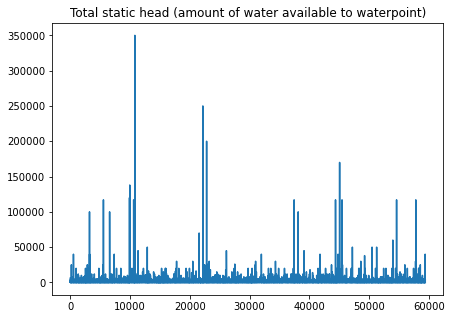

Aantal missing values voor deze variabele is:  0


In [234]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['amount_tsh'].plot()
plt.title('Total static head (amount of water available to waterpoint)')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['amount_tsh'].isnull().sum())

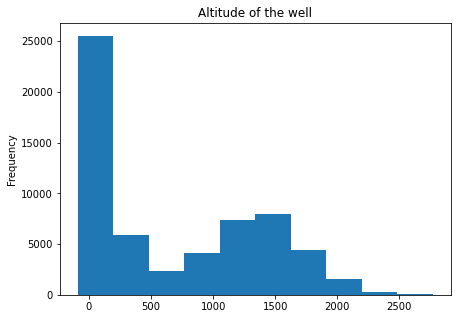

Aantal missing values voor deze variabele is:  0


In [55]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['gps_height'].plot(kind='hist')
plt.title('Altitude of the well')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['gps_height'].isnull().sum())

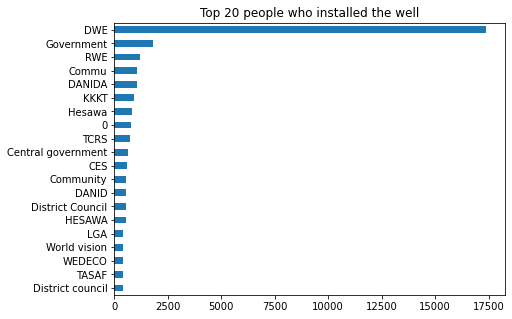

Aantal missing values voor deze variabele is:  3655


In [56]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['installer'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Top 20 people who installed the well')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['installer'].isnull().sum())

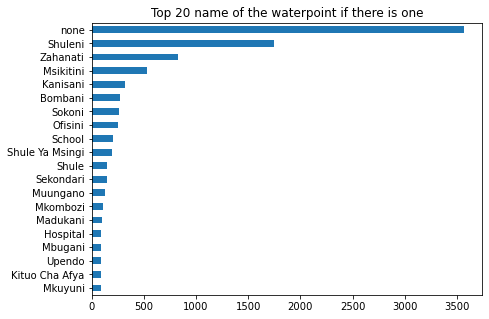

Aantal missing values voor deze variabele is:  0


In [63]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['wpt_name'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Top 20 name of the waterpoint if there is one')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['wpt_name'].isnull().sum())

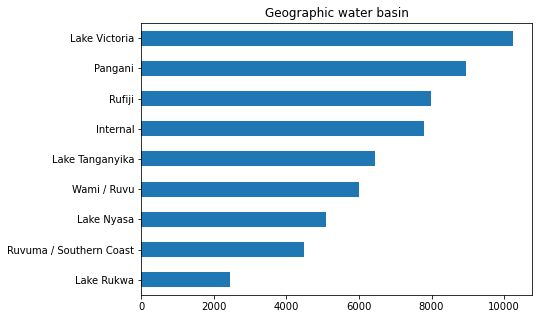

Aantal missing values voor deze variabele is:  0


In [64]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['basin'].value_counts().sort_values().plot(kind='barh')
plt.title('Geographic water basin')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['basin'].isnull().sum())

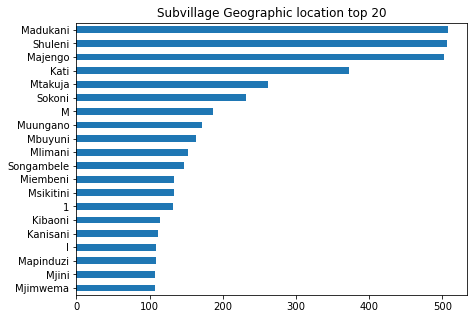

Aantal missing values voor deze variabele is:  371


In [68]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['subvillage'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Subvillage Geographic location top 20')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['subvillage'].isnull().sum())

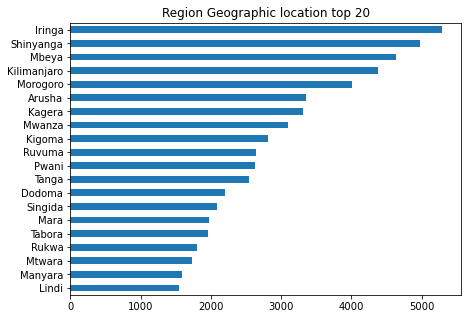

Aantal missing values voor deze variabele is:  0


In [69]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['region'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('Region Geographic location top 20')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['region'].isnull().sum())

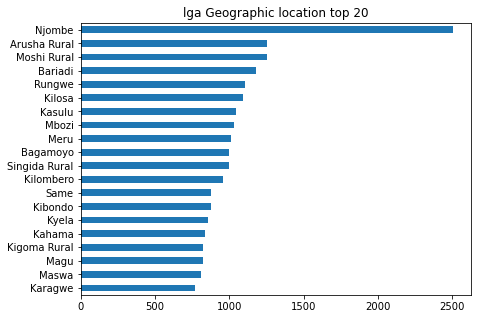

Aantal missing values voor deze variabele is:  0


In [71]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['lga'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('lga Geographic location top 20')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['lga'].isnull().sum())

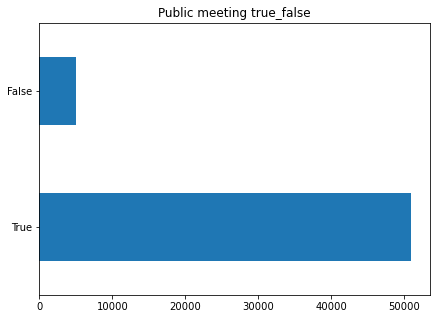

Aantal missing values voor deze variabele is:  3334


In [76]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['public_meeting'].value_counts().plot(kind='barh')
plt.title('Public meeting true_false')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['public_meeting'].isnull().sum())

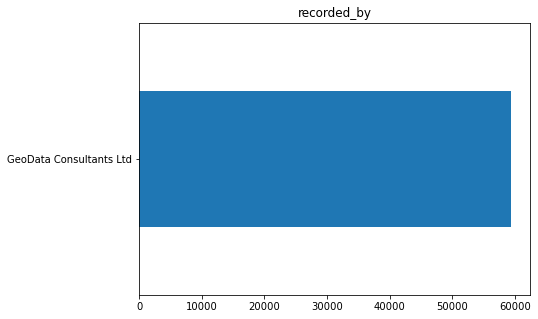

Aantal missing values voor deze variabele is:  0


In [78]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['recorded_by'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('recorded_by')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['recorded_by'].isnull().sum())

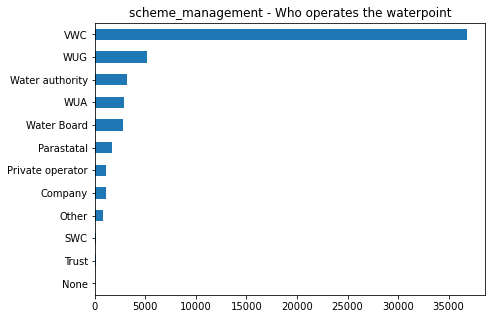

Aantal missing values voor deze variabele is:  3877


In [80]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['scheme_management'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('scheme_management - Who operates the waterpoint')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['scheme_management'].isnull().sum())

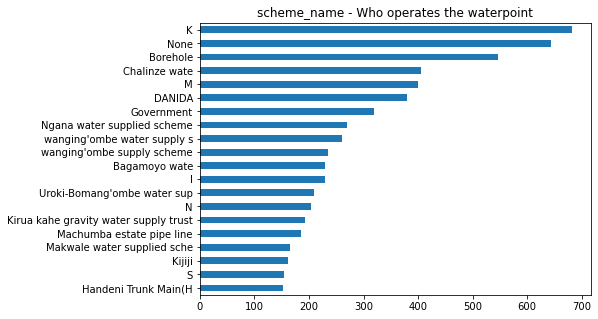

Aantal missing values voor deze variabele is:  28166


In [82]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['scheme_name'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('scheme_name - Who operates the waterpoint')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['scheme_name'].isnull().sum())

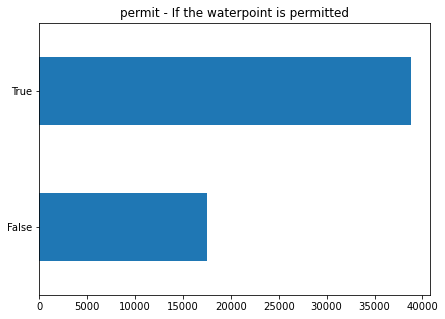

Aantal missing values voor deze variabele is:  3056


In [84]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['permit'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('permit - If the waterpoint is permitted')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['permit'].isnull().sum())

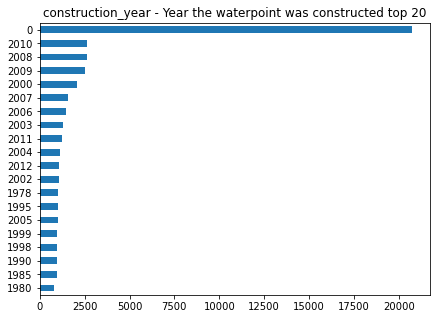

Aantal missing values voor deze variabele is:  0


In [88]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['construction_year'].value_counts()[:20].sort_values().plot(kind='barh')
plt.title('construction_year - Year the waterpoint was constructed top 20')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['construction_year'].isnull().sum())

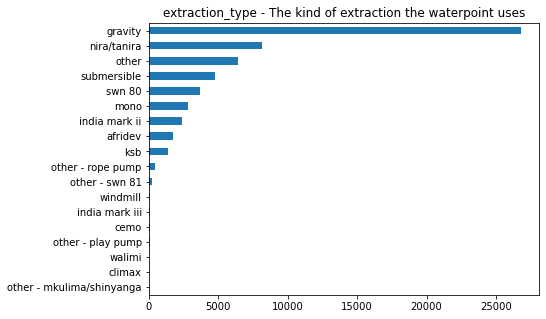

Aantal missing values voor deze variabele is:  0


In [91]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['extraction_type'].value_counts().sort_values().plot(kind='barh')
plt.title('extraction_type - The kind of extraction the waterpoint uses')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type'].isnull().sum())

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['extraction_type'].value_counts().sort_values().plot(kind='barh')
plt.title('extraction_type - The kind of extraction the waterpoint uses')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type'].isnull().sum())

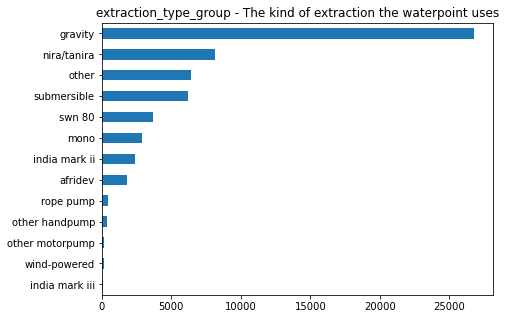

Aantal missing values voor deze variabele is:  0


In [92]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['extraction_type_group'].value_counts().sort_values().plot(kind='barh')
plt.title('extraction_type_group - The kind of extraction the waterpoint uses')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type_group'].isnull().sum())

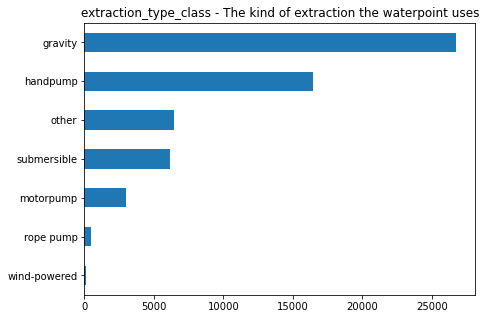

Aantal missing values voor deze variabele is:  0


In [93]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['extraction_type_class'].value_counts().sort_values().plot(kind='barh')
plt.title('extraction_type_class - The kind of extraction the waterpoint uses')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['extraction_type_class'].isnull().sum())

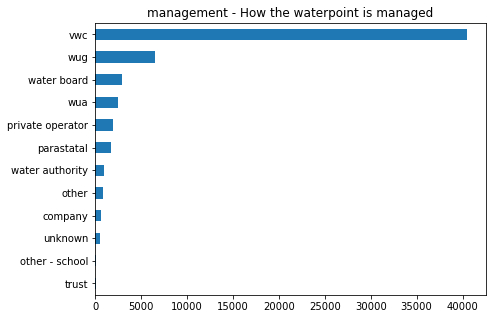

Aantal missing values voor deze variabele is:  0


In [95]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['management'].value_counts().sort_values().plot(kind='barh')
plt.title('management - How the waterpoint is managed')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['management'].isnull().sum())

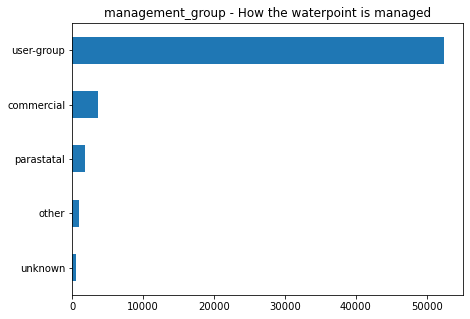

Aantal missing values voor deze variabele is:  0


In [96]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['management_group'].value_counts().sort_values().plot(kind='barh')
plt.title('management_group - How the waterpoint is managed')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['management_group'].isnull().sum())

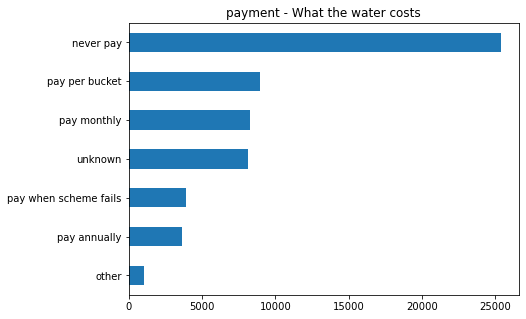

Aantal missing values voor deze variabele is:  0


In [97]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['payment'].value_counts().sort_values().plot(kind='barh')
plt.title('payment - What the water costs')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['payment'].isnull().sum())

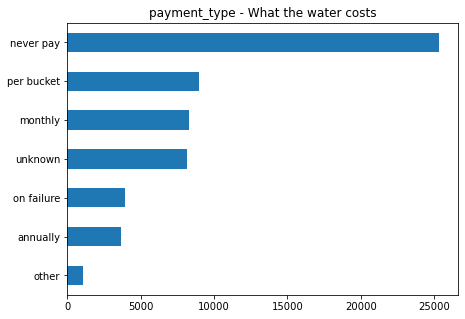

Aantal missing values voor deze variabele is:  0


In [98]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['payment_type'].value_counts().sort_values().plot(kind='barh')
plt.title('payment_type - What the water costs')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['payment_type'].isnull().sum())

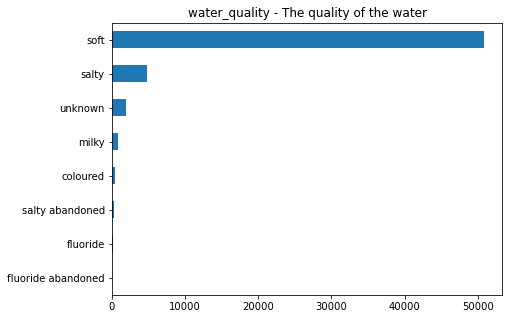

Aantal missing values voor deze variabele is:  0


In [99]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['water_quality'].value_counts().sort_values().plot(kind='barh')
plt.title('water_quality - The quality of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['water_quality'].isnull().sum())

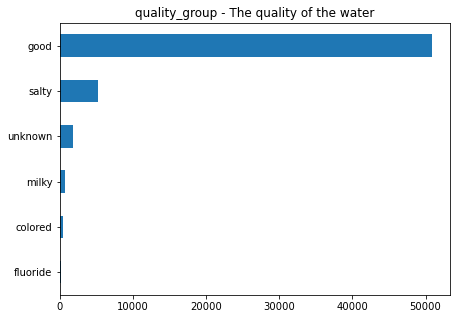

Aantal missing values voor deze variabele is:  0


In [100]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['quality_group'].value_counts().sort_values().plot(kind='barh')
plt.title('quality_group - The quality of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['quality_group'].isnull().sum())

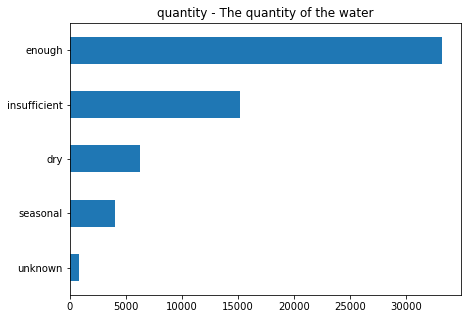

Aantal missing values voor deze variabele is:  0


In [101]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['quantity'].value_counts().sort_values().plot(kind='barh')
plt.title('quantity - The quantity of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['quantity'].isnull().sum())

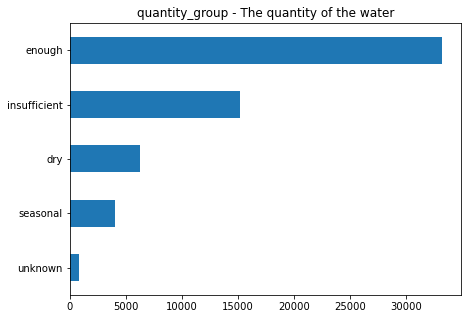

Aantal missing values voor deze variabele is:  0


In [102]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['quantity_group'].value_counts().sort_values().plot(kind='barh')
plt.title('quantity_group - The quantity of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['quantity_group'].isnull().sum())

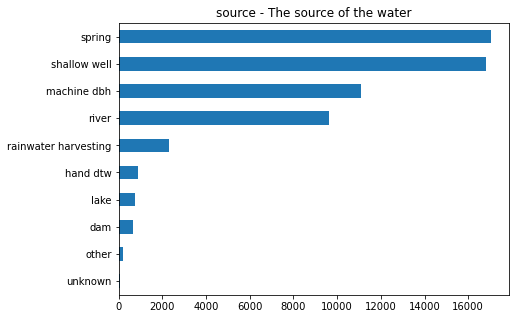

Aantal missing values voor deze variabele is:  0


In [103]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['source'].value_counts().sort_values().plot(kind='barh')
plt.title('source - The source of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['source'].isnull().sum())

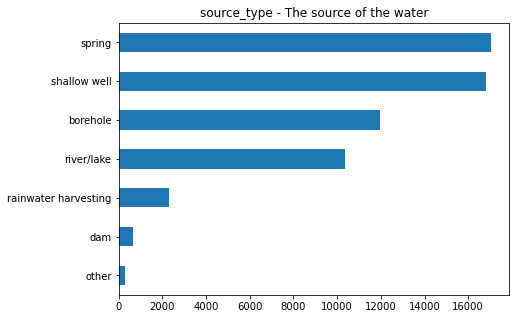

Aantal missing values voor deze variabele is:  0


In [104]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['source_type'].value_counts().sort_values().plot(kind='barh')
plt.title('source_type - The source of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['source_type'].isnull().sum())

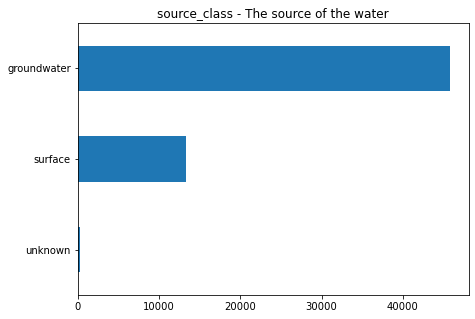

Aantal missing values voor deze variabele is:  0


In [105]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['source_class'].value_counts().sort_values().plot(kind='barh')
plt.title('source_class - The source of the water')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['source_class'].isnull().sum())

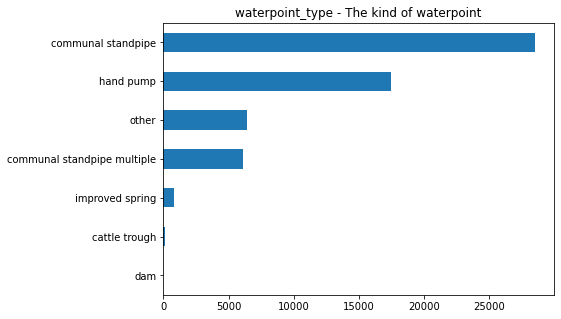

Aantal missing values voor deze variabele is:  0


In [106]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['waterpoint_type'].value_counts().sort_values().plot(kind='barh')
plt.title('waterpoint_type - The kind of waterpoint')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['waterpoint_type'].isnull().sum())

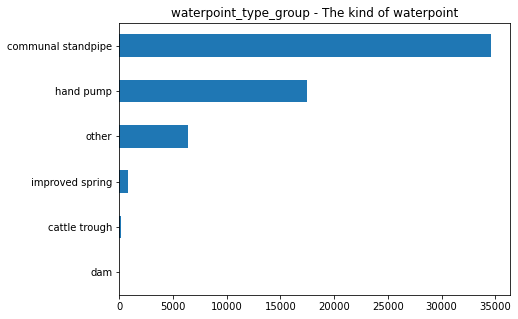

Aantal missing values voor deze variabele is:  0


In [107]:
fig, ax = plt.subplots(figsize=(7,5))
ax = df_train_x['waterpoint_type_group'].value_counts().sort_values().plot(kind='barh')
plt.title('waterpoint_type_group - The kind of waterpoint')
plt.show()

print('Aantal missing values voor deze variabele is: ' , df_train_x['waterpoint_type_group'].isnull().sum())

#### Check missing variables and how to imput

In [15]:
df_train_x_float = df_train_x.select_dtypes(include=['float64'])

In [16]:
df_train_x_object = df_train_x.select_dtypes(include=['object'])

In [17]:
df_train_x_int = df_train_x.select_dtypes(include=['int'])

In [222]:
df_train_x.info(null_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     59400 non-null  int64   
 1   amount_tsh             59400 non-null  float64 
 2   date_recorded          59400 non-null  object  
 3   funder                 55765 non-null  object  
 4   gps_height             59400 non-null  int64   
 5   installer              55745 non-null  object  
 6   longitude              59400 non-null  float64 
 7   latitude               59400 non-null  float64 
 8   wpt_name               59400 non-null  object  
 9   num_private            59400 non-null  int64   
 10  basin                  59400 non-null  object  
 11  subvillage             59029 non-null  object  
 12  region                 59400 non-null  object  
 13  region_code            59400 non-null  int64   
 14  district_code          59400 non-null 

In [251]:
print('testing a little', df_train_x)

testing a little           id  amount_tsh date_recorded           funder  gps_height  \
0      69572      6000.0    2011-03-14            Roman        1390   
1       8776         0.0    2013-03-06          Grumeti        1399   
2      34310        25.0    2013-02-25     Lottery Club         686   
3      67743         0.0    2013-01-28           Unicef         263   
4      19728         0.0    2011-07-13      Action In A           0   
...      ...         ...           ...              ...         ...   
59395  60739        10.0    2013-05-03  Germany Republi        1210   
59396  27263      4700.0    2011-05-07      Cefa-njombe        1212   
59397  37057         0.0    2011-04-11              NaN           0   
59398  31282         0.0    2011-03-08            Malec           0   
59399  26348         0.0    2011-03-23       World Bank         191   

          installer  longitude   latitude              wpt_name  num_private  \
0             Roman  34.938093  -9.856322         